# A Naive Bayes Movie Classifier

### 0. Import necessary libraries

In [1]:
import pandas
from pandas import DataFrame

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score,precision_score

import warnings
warnings.filterwarnings("ignore")

Dataset = pandas.read_csv('./final_data.csv')

### 1. Train and Validation data

In [2]:
Dataset.shape

(494, 39)

In [3]:
Dataset.head()

,Index,Marketing.expense,Production.expense,Multiplex.coverage,Budget,Movie_length,Lead_.Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Critic_rating_mms,Trailer_views_mms,X3D_available_mms,Time_taken_mms,Twitter_hastags_mms,Genre_mms,Avg_age_actors_mms,Num_multiplex_mms,Collection_mms,Start_Tech_Oscar_mms
0,1,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,0.478571,0.886108,1,0.503862,0.012457,0.000000,0.350877,0.300935,0.422222,1
1,2,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,0.300000,0.792238,0,0.674145,0.023228,0.333333,0.684211,0.241121,0.368889,0
2,3,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,0.300000,0.941576,0,0.679846,1.000000,0.666667,0.614035,0.233645,0.660000,1
3,4,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,0.592857,0.854863,1,0.852152,0.013283,0.333333,0.736842,0.259813,0.631111,1
4,5,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,0.592857,0.897608,0,0.811328,0.013529,0.333333,0.912281,0.115888,0.693333,1


In [4]:
y = Dataset['Start_Tech_Oscar']
x = Dataset.drop('Start_Tech_Oscar', axis=1)

In [5]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

##### A. Training and Validation data set size
- 3:1 ratio for training and validation sets, respectively.

In [6]:
TrainMov, ValMov, TrainLabel, ValLabel = train_test_split(x,y,
test_size=0.25,
shuffle=True, 
random_state=3000)

In [7]:
TrainMov.head()

,Index,Marketing.expense,Production.expense,Multiplex.coverage,Budget,Movie_length,Lead_.Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Critic_rating_mms,Trailer_views_mms,X3D_available_mms,Time_taken_mms,Twitter_hastags_mms,Genre_mms,Avg_age_actors_mms,Num_multiplex_mms,Collection_mms,Start_Tech_Oscar_mms
418,429,167.3422,91.20,0.321,34402.115,151.6,8.940,9.070,9.005,9.110,...,0.485714,0.404126,1,0.783376,0.022297,0.000000,0.736842,0.646729,0.133333,0
246,253,21.6442,66.72,0.569,38646.135,80.3,5.410,5.575,5.450,5.755,...,0.207143,0.905064,0,0.826775,0.023931,1.000000,0.947368,0.117757,0.546667,1
420,431,189.8426,91.20,0.416,35263.140,159.6,8.860,9.105,8.920,9.005,...,0.128571,0.574365,0,0.835785,0.011623,0.000000,0.877193,0.568224,0.211111,0
482,494,23.4662,74.38,0.415,31702.385,127.5,8.650,8.865,8.790,8.930,...,0.557143,0.644300,1,0.545789,0.045209,0.000000,0.491228,0.463551,0.373333,0
359,368,290.4440,91.20,0.369,21458.965,173.5,9.235,9.305,9.230,9.215,...,0.485714,0.714497,0,0.915962,0.012378,0.333333,0.368421,0.422430,0.402222,1


##### B. Check the splitted data sets


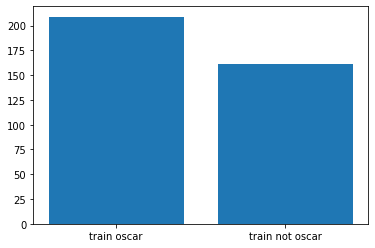

Total Number of Training Examples: 
370
Ratio of oscars in Training Examples: 
0.5648648648648649


In [8]:
label = ['train oscar', 'train not oscar']
values = [sum(TrainLabel), len(TrainLabel)-sum(TrainLabel)]

x = np.arange(2)
plt.bar(x, values)
plt.xticks(x, label)
plt.show()

print("Total Number of Training Examples: ")
print(len(TrainMov))
print("Ratio of oscars in Training Examples: ")
print(sum(TrainLabel)/len(TrainMov))

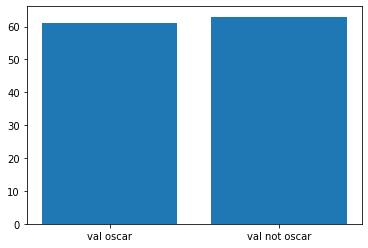

Total Number of Validation Examples: 
124
Ratio of Spam Mails in Validation Examples: 
0.49193548387096775


In [9]:
label = ['val oscar', 'val not oscar']
values = [sum(ValLabel), len(ValLabel)-sum(ValLabel)]

x = np.arange(2)
plt.bar(x, values)
plt.xticks(x, label)
plt.show()

print("Total Number of Validation Examples: ")
print(len(ValMov))
print("Ratio of Spam Mails in Validation Examples: ")
print(sum(ValLabel)/len(ValMov))

### 2. Implementation of Naive Bayes Models

##### A. Gaussion Naive Bayes

In [10]:
model1 = GaussianNB()
model1.fit(TrainMov,TrainLabel)

ValPred1 = model1.predict(ValMov)

##### B. Multinomial Naive Bayes

In [11]:
model2 = MultinomialNB()
model2.fit(TrainMov,TrainLabel)

ValPred2 = model2.predict(ValMov)

### 3. Model Selection
- Calculate the following scores for each model
    - recall score
    - precision score
    - accuracy score

![confusion_matrix](./confusionMatrix.jpg)

##### A. Gaussian Naive Bayes

In [12]:
label=['oscar', 'nonoscar']
print(confusion_matrix(ValLabel, ValPred2))
print('F1 score: ', f1_score(ValLabel, ValPred1))
print('recall score: ', recall_score(ValLabel, ValPred1))
print('precision score: ', precision_score(ValLabel, ValPred1))
print('accuracy score: ', accuracy_score(ValLabel, ValPred1))

[[47 16]
 [36 25]]
F1 score:  0.40476190476190477
recall score:  0.2786885245901639
precision score:  0.7391304347826086
accuracy score:  0.5967741935483871


##### B. Multinomial Naive Bayes

In [13]:
label=['oscar', 'nonoscar']
print(confusion_matrix(ValLabel, ValPred2))
print('F1 score: ', f1_score(ValLabel, ValPred2))
print('recall score: ', recall_score(ValLabel, ValPred2))
print('precision score: ', precision_score(ValLabel, ValPred2))
print('accuracy score: ', accuracy_score(ValLabel, ValPred2))

[[47 16]
 [36 25]]
F1 score:  0.4901960784313726
recall score:  0.4098360655737705
precision score:  0.6097560975609756
accuracy score:  0.5806451612903226
